In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('insurance.csv')

In [117]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [119]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [120]:
df.duplicated().sum()

1

In [121]:
df.drop_duplicates(inplace=True)

In [122]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [123]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [124]:
df['sex'] =df['sex'].map({'female':0 , 'male':1})

In [125]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


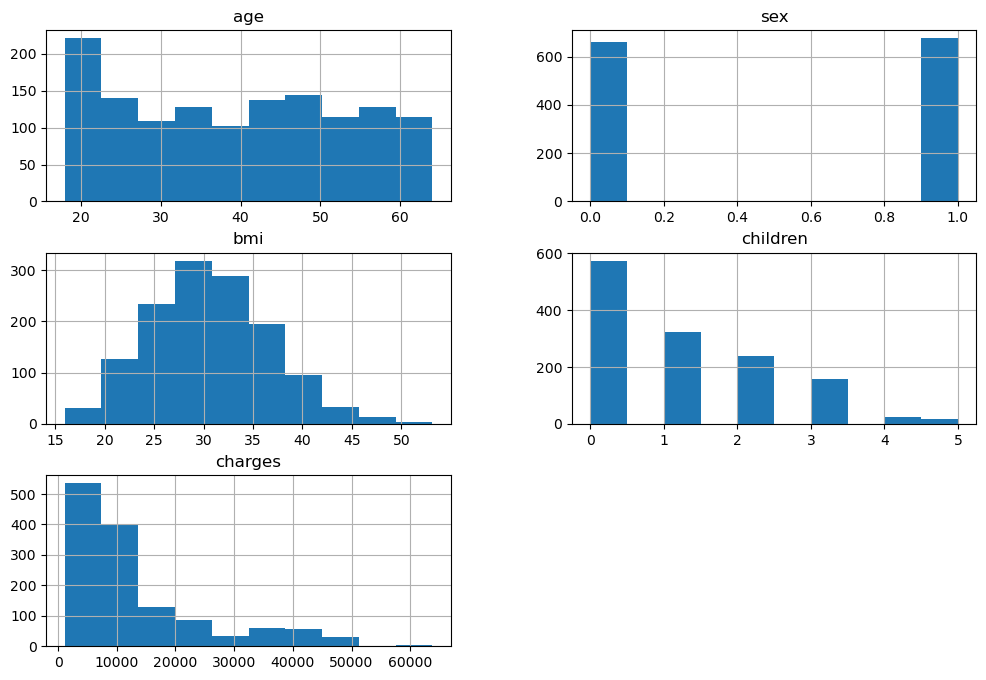

In [126]:
df.hist(figsize=(12,8))
plt.show()


<Axes: xlabel='age', ylabel='Count'>

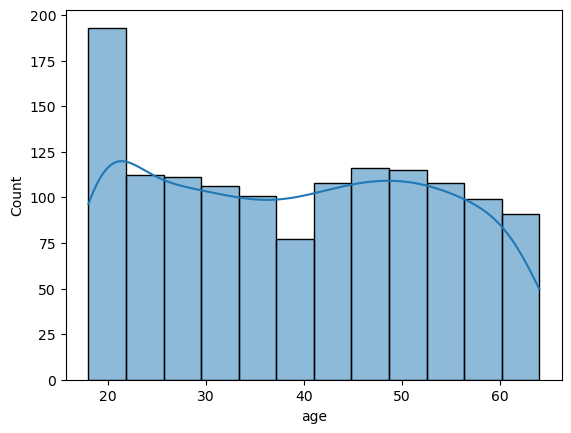

In [127]:
sns.histplot(df["age"], kde=True)


<Axes: xlabel='age', ylabel='charges'>

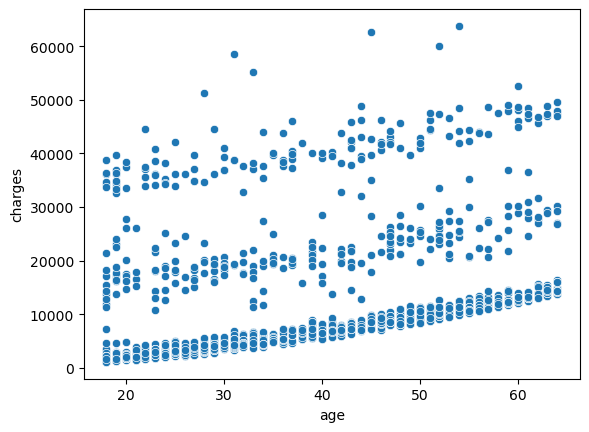

In [128]:
sns.scatterplot(x="age", y="charges", data=df ,palette='cubehelix')


In [129]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
endoe = LabelEncoder()

In [132]:
df['region']=endoe.fit_transform(df['region'])

In [133]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,1,10600.54830
1334,18,0,31.920,0,no,0,2205.98080
1335,18,0,36.850,0,no,2,1629.83350
1336,21,0,25.800,0,no,3,2007.94500


In [134]:
df['smoker'] =df['smoker'].map({'no':0 , 'yes':1})

In [135]:
X = df.drop('charges' , axis = 1)

In [136]:
y = df['charges']

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [138]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [139]:
X_train.shape

(1069, 6)

In [140]:
X_test.shape

(268, 6)

In [141]:
linear = LinearRegression()

In [142]:
linear.fit(X_train , y_train)

LinearRegression()

In [172]:
y_pred = linear.predict(X_test)

In [174]:
tree = RandomForestRegressor()

In [178]:
tree.fit(X_train , y_train)

RandomForestRegressor()

In [180]:
y_pred_tree = tree.predict(X_test)

In [182]:
r2_score(y_test , y_pred)

0.7526116094775537

In [184]:
r2_score(y_test , y_pred_tree)

0.8248623454959391